In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv('Loan_Train.csv', na_values=' ')
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
test_df = pd.read_csv('Loan_Test.csv', na_values=' ')
test_df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban


In [4]:
# Functions for preprocessing 
def eda(data):
    print("-----------STATISTICAL Information-----------")
    print(data.describe())
    
    print("-----------Data Types-----------")
    print(data.dtypes)

    print("----------Null value-----------")
    print(data.isna().sum())

    print("----------Shape of Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64']) #select columns with quantity for analysis
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

## Preprocessing

### Train

-----------STATISTICAL Information-----------
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
-----------Data Types-----------
Loan_ID               object


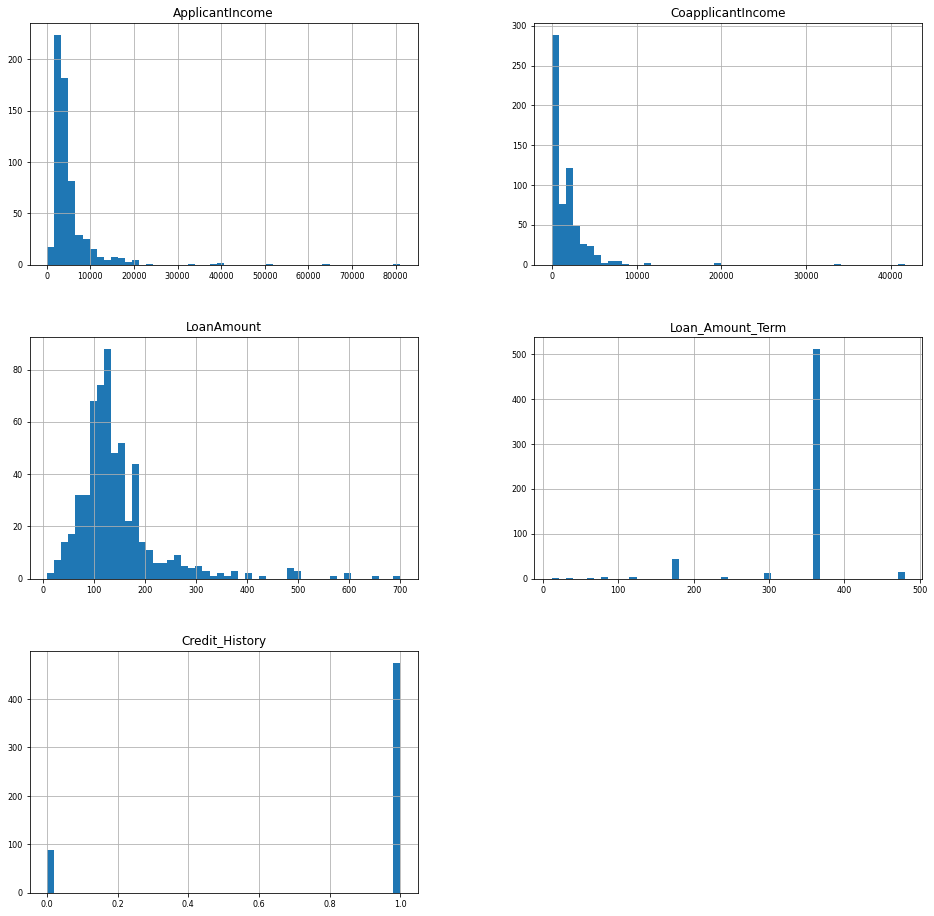

In [5]:
# Loan train insights
eda(df)
graph_insight(df)

In [6]:
# Drop Duplicate Data
subset = df.columns
drop_duplicate(df, subset = subset)

Before drop shape: (614, 13)
After drop shape: (614, 13)
Total Duplicate: 0


### Test

-----------STATISTICAL Information-----------
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
-----------Data Types-----------
Loan_ID               object


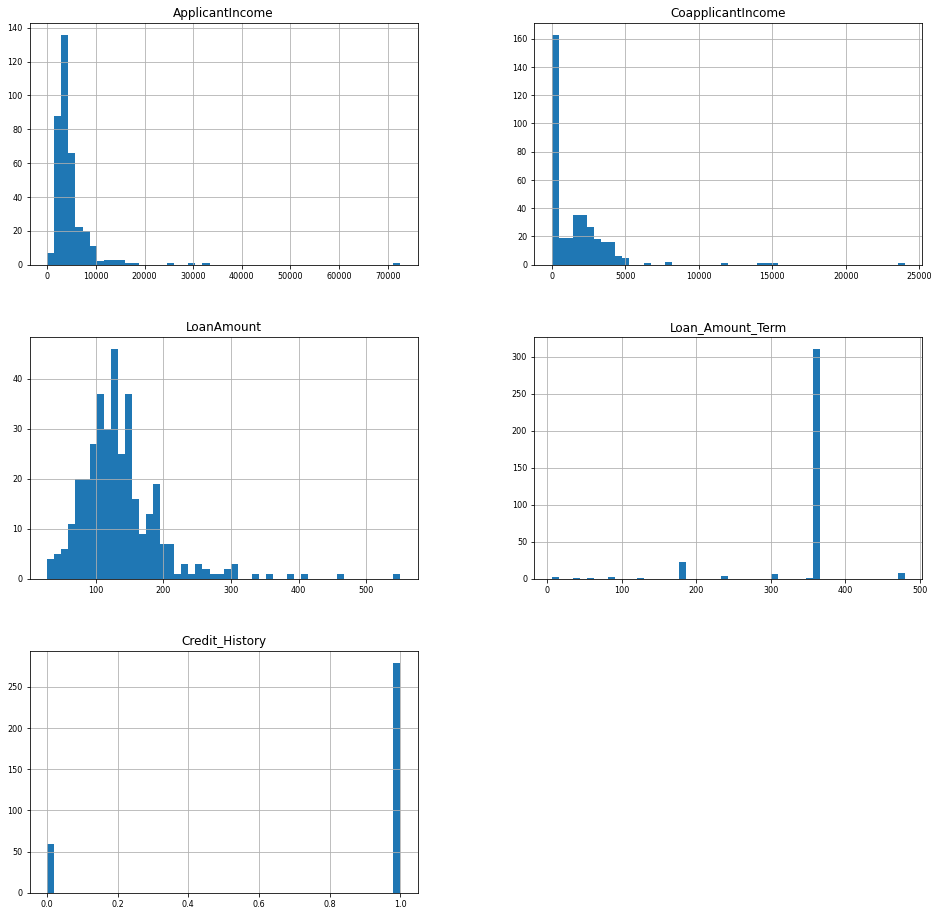

In [7]:
# Loan train insights
eda(test_df)
graph_insight(test_df)

In [8]:
# Drop Duplicate Data
subset = test_df.columns
drop_duplicate(test_df, subset = subset)

Before drop shape: (367, 12)
After drop shape: (367, 12)
Total Duplicate: 0


### Changing column values to boolean

>- CHECK FOR UNIQUE INPUTS

In [9]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [10]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
test_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

>- CHANGE VALUES TO BOOLEAN

In [13]:
df['Loan_Status'] = df['Loan_Status'].map(
                   {'Y':1 ,'N':0})
# Note no loan status in test_df

df['Married'] = df['Married'].map(
                   {'Yes':1 ,'No':0})
test_df['Married'] = test_df['Married'].map(
                   {'Yes':1 ,'No':0})

df['Gender'] = df['Gender'].map(
                    {'Male':1 ,'Female':0})
test_df['Gender'] = test_df['Gender'].map(
                    {'Male':1 ,'Female':0})

df['Education'] = df['Education'].map(
                   {'Graduate':1 ,'Not Graduate':0})
test_df['Education'] = test_df['Education'].map(
                   {'Graduate':1 ,'Not Graduate':0})

df['Self_Employed'] = df['Self_Employed'].map(
                   {'Yes':1 ,'No':0})
test_df['Self_Employed'] = test_df['Self_Employed'].map(
                   {'Yes':1 ,'No':0})


>- CHANGE VALUES

In [14]:
df['Dependents'] = df['Dependents'].map(
                   {'3+':3})
test_df['Dependents'] = test_df['Dependents'].map(
                   {'3+':3})

>- REPLACE NAN WITH 0

In [15]:
# Replace NaN on multiple columns
df[["Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]] = df[["Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]].fillna(0)

'''
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
'''

'\nGender               13\nMarried               3\nDependents           15\nEducation             0\nSelf_Employed        32\nApplicantIncome       0\nCoapplicantIncome     0\nLoanAmount           22\nLoan_Amount_Term     14\nCredit_History       50\n'

In [16]:
test_df.isna().sum()

Loan_ID                0
Gender                11
Married                0
Dependents           327
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
dtype: int64

In [17]:
test_df[["Gender", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]] = test_df[["Gender", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]].fillna(0)

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,0.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,0.0,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,0.0,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [19]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1.0,1,0.0,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1.0,1,0.0,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1.0,1,0.0,1,0.0,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,0.0,Semiurban
365,LP002986,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,Rural


>- VISUALISATION

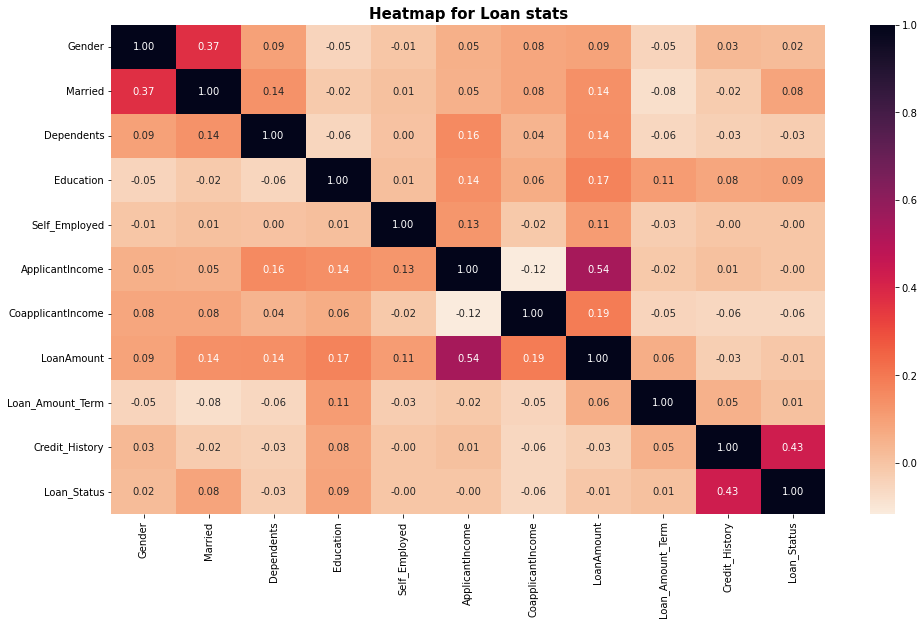

In [20]:
# plotting heatmap
f, ax = plt.subplots(figsize=(16, 9))
plt.title('Heatmap for Loan stats', color = 'black', fontsize = '15', weight = 'bold')
sb.heatmap(df.corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

# strong corr between loan amount and applicant income.

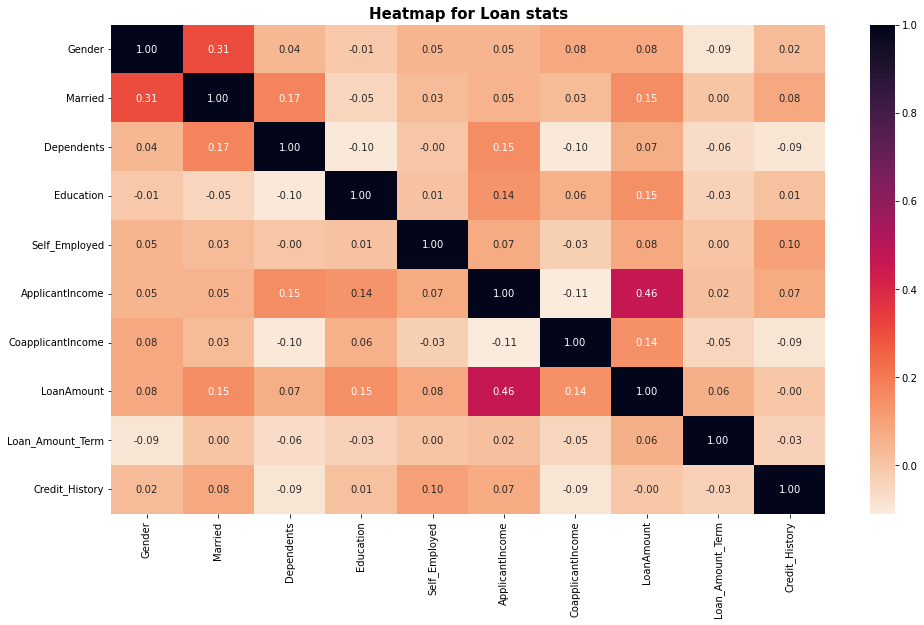

In [21]:
# plotting heatmap
f, ax = plt.subplots(figsize=(16, 9))
plt.title('Heatmap for Loan stats', color = 'black', fontsize = '15', weight = 'bold')
sb.heatmap(test_df.corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

# There is a strong corr between loan amount and applicant income.

>- Datatype cleaning

In [22]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [23]:
test_df.dtypes

Loan_ID               object
Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [24]:
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']] = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']].astype("float")

In [25]:
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].astype("float")

>- USING ONE-HOT ENCODING FOR LOAN_ID COLUMN FOR TRAIN AND TEST DATASET

##### train encoding

In [26]:
# use pd.concat to join the new columns with original dataframe
df = pd.concat([df, pd.get_dummies(df['Loan_ID'], prefix='User')], axis=1)

# now drop the original 'Loan_ID' column (I don't need it anymore)
df.drop(['Loan_ID'],axis=1, inplace=True)

In [27]:
# use pd.concat to join the new columns with original dataframe
df = pd.concat([df, pd.get_dummies(df['Property_Area'], prefix='User')], axis=1)

# now drop the original 'Property_Area' column (I don't need it anymore)
df.drop(['Property_Area'],axis=1, inplace=True)

##### test encoding

In [28]:
# use pd.concat to join the new columns with original dataframe
test_df = pd.concat([test_df, pd.get_dummies(test_df['Loan_ID'], prefix='User')], axis=1)

# now drop the original 'Loan_ID' column (I don't need it anymore)
test_df.drop(['Loan_ID'],axis=1, inplace=True)

In [29]:
# use pd.concat to join the new columns with original dataframe
test_df = pd.concat([test_df, pd.get_dummies(test_df['Property_Area'], prefix='User')], axis=1)

# now drop the original 'Property_Area' column (I don't need it anymore)
test_df.drop(['Property_Area'],axis=1, inplace=True)

## Model building

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



X = df.drop(columns=['Loan_Status', 'Gender'])
y = df['Loan_Status']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=3)


print(X.shape)
print(y.shape)

(614, 626)
(614,)


In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
y_pred = knn.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 5, 33],
       [13, 72]], dtype=int64)

>- Get accuracy

In [34]:
accuracy_score(y_test, y_pred)

0.6260162601626016

>- Get precision

In [35]:
precision_score(y_test, y_pred)

0.6857142857142857

>- Get recall

In [36]:
recall_score(y_test, y_pred)

0.8470588235294118

>- Get f1 score

In [37]:
f1_score(y_test, y_pred)

0.7578947368421053

##### Get the best classifier

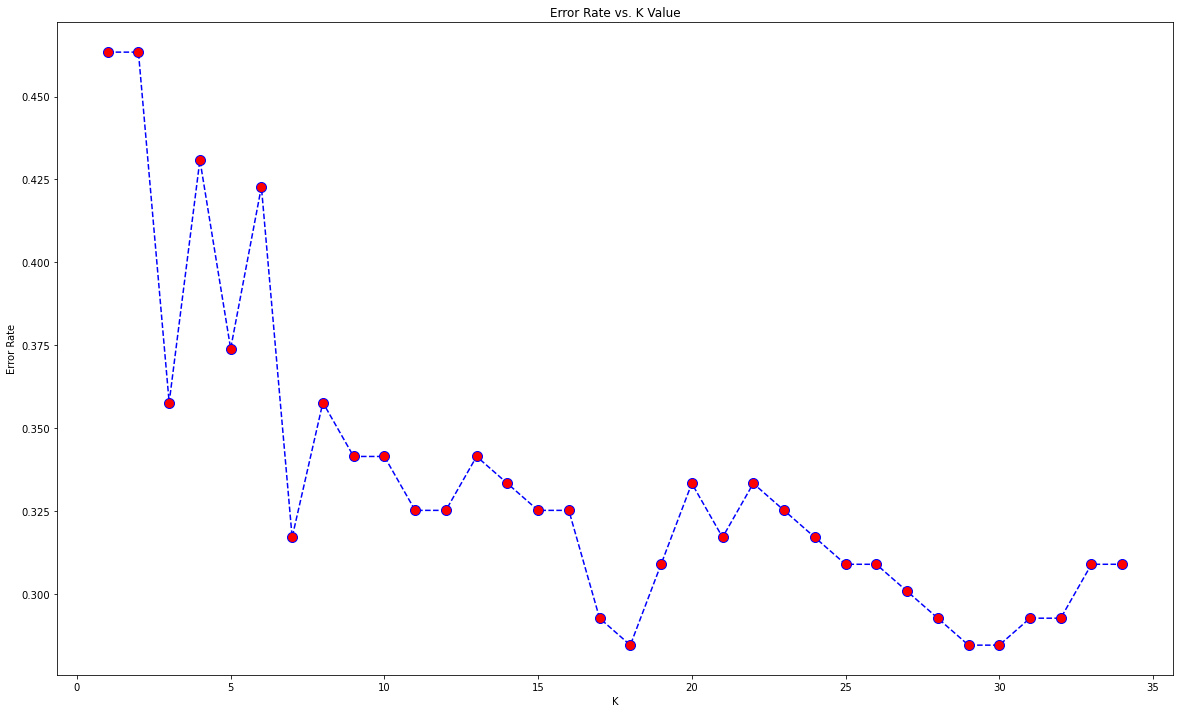

Minimum error:- 0.2845528455284553 at K = 18


In [38]:
error_rate = []
for i in range(1,35):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(20,12))
plt.plot(range(1,35),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [39]:
knn = KNeighborsClassifier(n_neighbors=18, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7154471544715447

In [42]:
precision_score(y_test, y_pred)

0.7192982456140351

In [43]:
recall_score(y_test, y_pred)

0.9647058823529412

In [44]:
f1_score(y_test, y_pred)

0.8241206030150753